In [1]:
from multi_imbalance.datasets import load_datasets
import experiment_safeness_autoencoder_k20_mindist_minority as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'balance-scale'
test_on_all_folds = True
test_all_ds = False

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy2(datasets)

In [6]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
                               'units_2nd_layer': 256,
                               'units_3rd_layer': 128,
                               'units_latent_layer': 8},
                 'weighted_triplet_loss': True,
                 'lr': 0.0002,
                 'batch_size': 16,
                 'gamma': 0.99,
                 'epochs': 30}


config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
                                       'units_2nd_layer': 512,
                                       'units_3rd_layer': 256,
                                       'units_latent_layer': 16},
                         'weighted_triplet_loss': True,
                         'lr': 0.0010,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 45}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
                                      'units_2nd_layer': 128,
                                      'units_3rd_layer': 64,
                                      'units_latent_layer': 16},
                        'weighted_triplet_loss': True,
                        'lr': 0.0015,
                        'batch_size': 16,
                        'gamma': 0.99,
                        'epochs': 30}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
                                       'units_2nd_layer': 256,
                                       'units_3rd_layer': 128,
                                       'units_latent_layer': 16},
                         'weighted_triplet_loss': True,
                         'lr': 0.001,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 45}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
                                     'units_2nd_layer': 300,
                                     'units_3rd_layer': 200,
                                     'units_latent_layer': 12},
                       'weighted_triplet_loss': True,
                       'lr': 0.0004,
                       'batch_size': 32,
                       'gamma': 0.99,
                       'epochs': 3}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
                                         'units_2nd_layer': 256,
                                         'units_3rd_layer': 128,
                                         'units_latent_layer': 10},
                           'weighted_triplet_loss': True,
                           'lr': 0.007,
                           'batch_size': 16,
                           'gamma': 0.99,
                           'epochs': 50}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
                                     'units_2nd_layer': 72,
                                     'units_3rd_layer': 48,
                                     'units_latent_layer': 16},
                       'weighted_triplet_loss': True,
                       'lr': 0.00002,
                       'batch_size': 16,
                       'gamma': 0.99,
                       'epochs': 50}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
                                        'units_2nd_layer': 256,
                                        'units_3rd_layer': 128,
                                        'units_latent_layer': 16},
                          'weighted_triplet_loss': True,
                          'lr': 0.00002,
                          'batch_size': 16,
                          'gamma': 0.99,
                          'epochs': 50}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
                                 'units_2nd_layer': 256,
                                 'units_3rd_layer': 128,
                                 'units_latent_layer': 12},
                   'weighted_triplet_loss': True,
                   'lr': 0.001,
                   'batch_size': 16,
                   'gamma': 0.99,
                   'epochs': 50}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
                                              'units_2nd_layer': 64,
                                              'units_3rd_layer': 32,
                                              'units_latent_layer': 8},
                                'weighted_triplet_loss': True,
                                'lr': 0.001,
                                'batch_size': 16,
                                'gamma': 0.99,
                                'epochs': 50}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
                                     'units_2nd_layer': 128,
                                     'units_3rd_layer': 64,
                                     'units_latent_layer': 12},
                       'weighted_triplet_loss': True,
                       'lr': 0.0001,
                       'batch_size': 16,
                       'gamma': 0.99,
                       'epochs': 50}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
                                         'units_2nd_layer': 64,
                                         'units_3rd_layer': 32,
                                         'units_latent_layer': 8},
                           'weighted_triplet_loss': True,
                           'lr': 0.001,
                           'batch_size': 16,
                           'gamma': 0.99,
                           'epochs': 50}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
                                               'units_2nd_layer': 128,
                                               'units_3rd_layer': 64,
                                               'units_latent_layer': 12},
                                 'weighted_triplet_loss': True,
                                 'lr': 0.003,
                                 'batch_size': 16,
                                 'gamma': 0.99,
                                 'epochs': 50}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
                                                  'units_2nd_layer': 128,
                                                  'units_3rd_layer': 64,
                                                  'units_latent_layer': 8},
                                    'weighted_triplet_loss': True,
                                    'lr': 0.004,
                                    'batch_size': 16,
                                    'gamma': 0.99,
                                    'epochs': 50}

config['3mocniej-cut'] = {'nn_config': {'units_1st_layer': 2,
                                        'units_2nd_layer': 128,
                                        'units_3rd_layer': 64,
                                        'units_latent_layer': 10},
                          'weighted_triplet_loss': True,
                          'lr': 0.04,
                          'batch_size': 16,
                          'gamma': 0.99,
                          'epochs': 50}


config['1czysty-cut'] = {'nn_config': {'units_1st_layer': 2,
                                       'units_2nd_layer': 64,
                                       'units_3rd_layer': 32,
                                       'units_latent_layer': 8},
                         'weighted_triplet_loss': True,
                         'lr': 0.004,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 50}

config['2delikatne-cut'] = {'nn_config': {'units_1st_layer': 2,
                                          'units_2nd_layer': 128,
                                          'units_3rd_layer': 64,
                                          'units_latent_layer': 12},
                            'weighted_triplet_loss': True,
                            'lr': 0.04,
                            'batch_size': 16,
                            'gamma': 0.99,
                            'epochs': 10}

In [7]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.004,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 50},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 12},
  'weighted_triplet_loss': True,
  'lr': 0.04,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 10},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 10},
  'weighted_triplet_loss': True,
  'lr': 0.04,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 50},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.004,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 50},
 'balance-scale': {'nn_config': {'unit

In [8]:
autoencoder_config = ex.autoenc_config_calc_strategy1(datasets)

In [9]:
autoencoder_config['hayes-roth'] = {
    "epochs": 25,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}

autoencoder_config['2delikatne-cut'] = {
    "epochs": 5,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}

In [10]:
k_dict = ex.construct_k_dict(datasets)
k_dict['balance-scale'] = 21
k_dict['new_vehicle'] = 13
k_dict['new_yeast'] = 21
k_dict['2delikatne-cut'] = 21

In [11]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1),
            "QDA": QuadraticDiscriminantAnalysis(),
            "LDA": LinearDiscriminantAnalysis()
        } 
    return classifiers

In [12]:
from experiment import dt_name_to_cols_to_encode


In [13]:
from sklearn.neighbors import KNeighborsClassifier

def calc_safety5(X,y):
    result = {
        "safe":0,
        "borderline":0,
        "rare":0,
        "outlier":0
    }
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
#         print(x)
#         print(y[i])
#         print(nbors[1:])
#         print(y[nbors[1:]])
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result['safe'] += 1
        elif same_class_nbrs >= 2:
            result['borderline'] += 1
        elif same_class_nbrs == 1:
            result['rare'] += 1
        else:
            result['outlier'] += 1
    return result

In [14]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

balance-scale


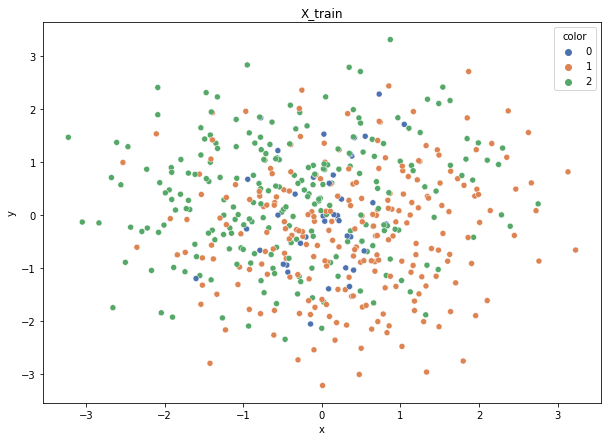

Class cardinalities: Counter({1: 231, 2: 230, 0: 39})
Weights: {0: 0.7471628063958148, 2: 0.1266928236932034, 1: 0.12614436991098174}
Training autoencoder...


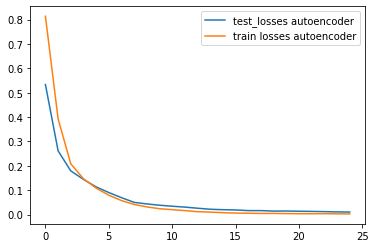

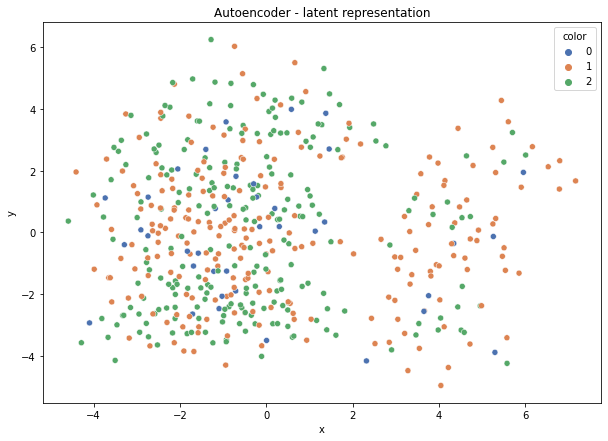

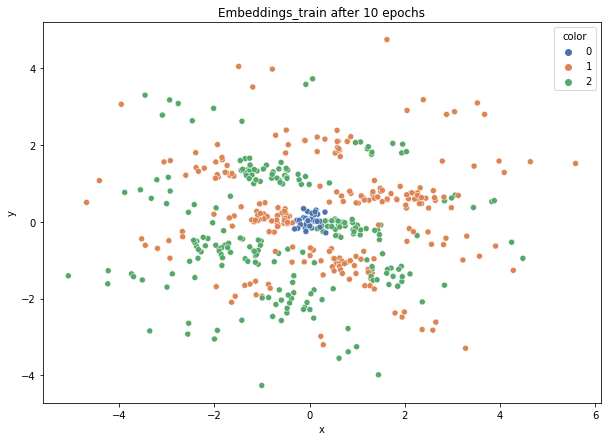

Zero loss!


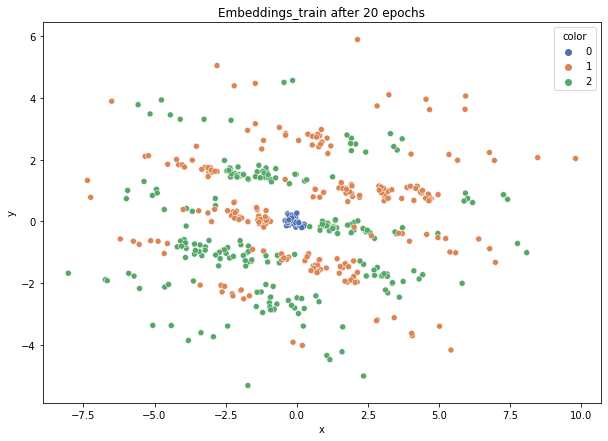

Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!


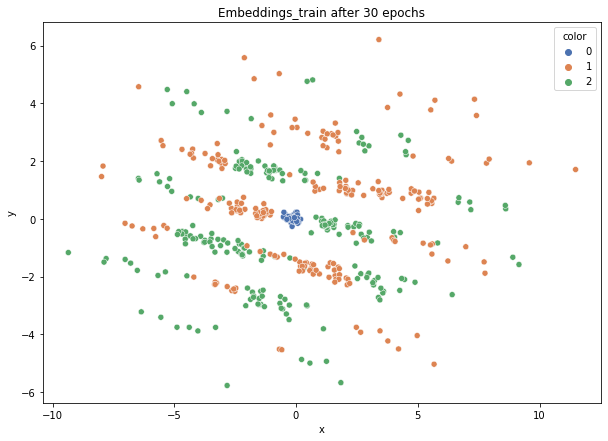

Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!


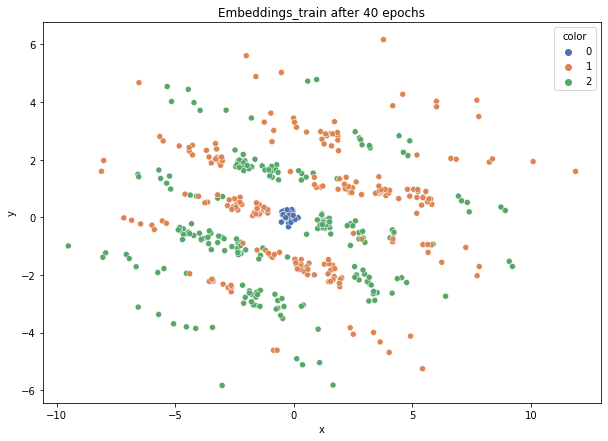

Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!
Zero loss!


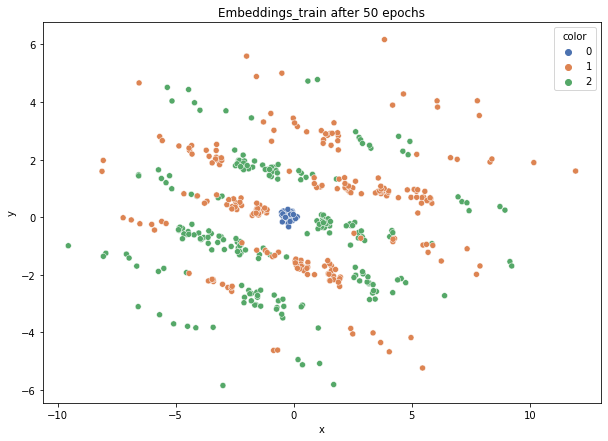

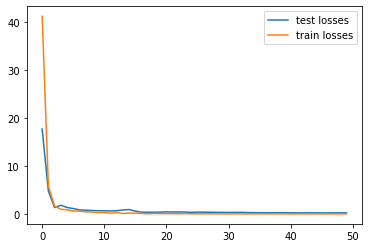

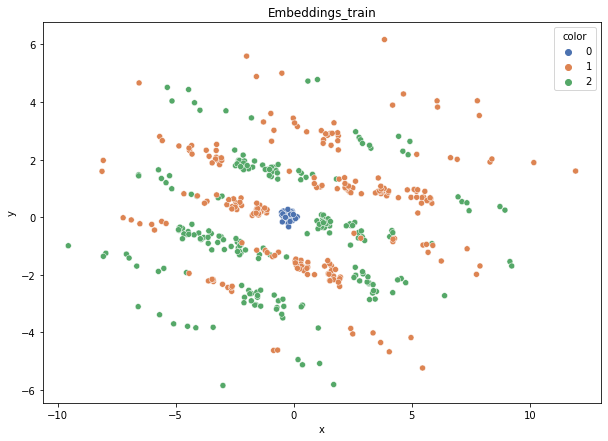

DT-f1-new-features: 0.884
DT-f1-old+new-features: 0.901
DT-f1-old-features: 0.568
DT-gmean-new-features: 0.88
DT-gmean-old+new-features: 0.897
DT-gmean-old-features: 0.088
KNN-f1-new-features: 0.942
KNN-f1-old+new-features: 0.946
KNN-f1-old-features: 0.568
KNN-gmean-new-features: 0.941
KNN-gmean-old+new-features: 0.959
KNN-gmean-old-features: 0.09
LDA-f1-new-features: 0.481
LDA-f1-old+new-features: 0.864
LDA-f1-old-features: 0.617
LDA-gmean-new-features: 0.082
LDA-gmean-old+new-features: 0.784
LDA-gmean-old-features: 0.098
QDA-f1-new-features: 0.74
QDA-f1-old+new-features: 0.846
QDA-f1-old-features: 0.936
QDA-gmean-new-features: 0.694
QDA-gmean-old+new-features: 0.771
QDA-gmean-old-features: 0.971
RF24-f1-new-features: 0.942
RF24-f1-old+new-features: 0.971
RF24-f1-old-features: 0.585
RF24-gmean-new-features: 0.941
RF24-gmean-old+new-features: 0.971
RF24-gmean-old-features: 0.092


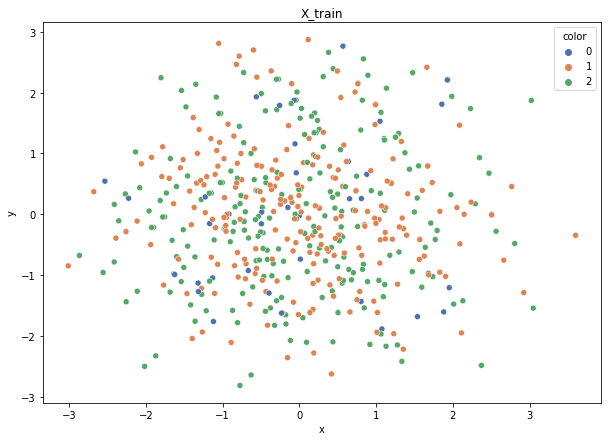

Class cardinalities: Counter({1: 231, 2: 230, 0: 39})
Weights: {0: 0.7471628063958148, 2: 0.1266928236932034, 1: 0.12614436991098174}
Training autoencoder...


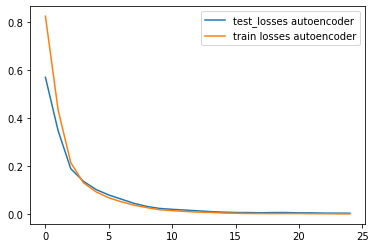

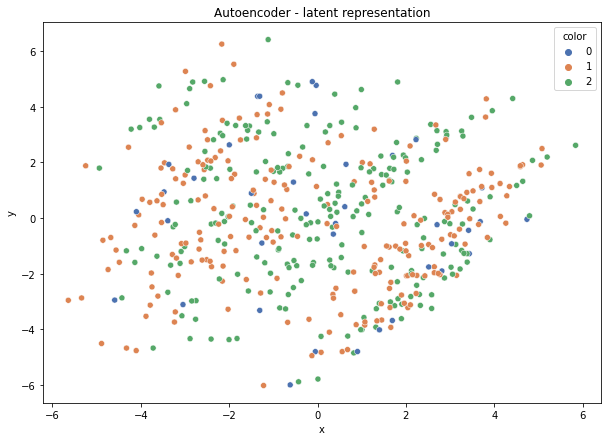

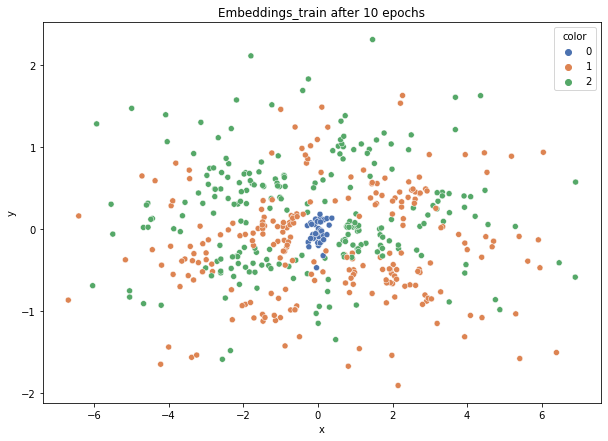

Zero loss!


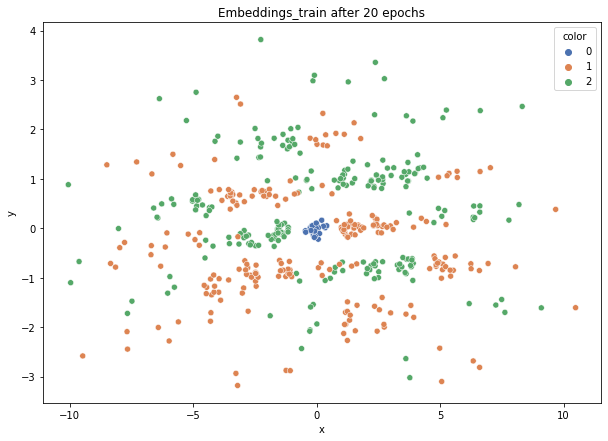

Zero loss!


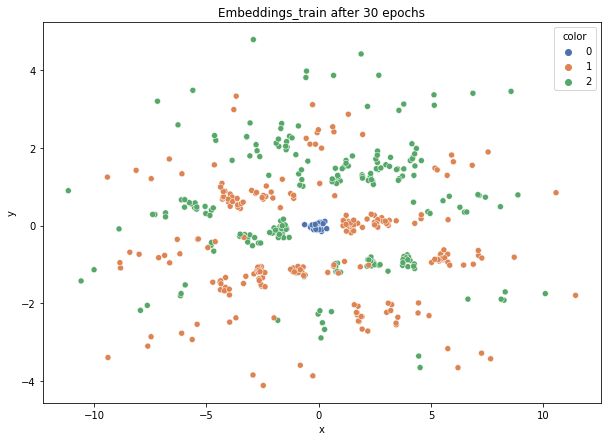

Zero loss!
Zero loss!
Zero loss!


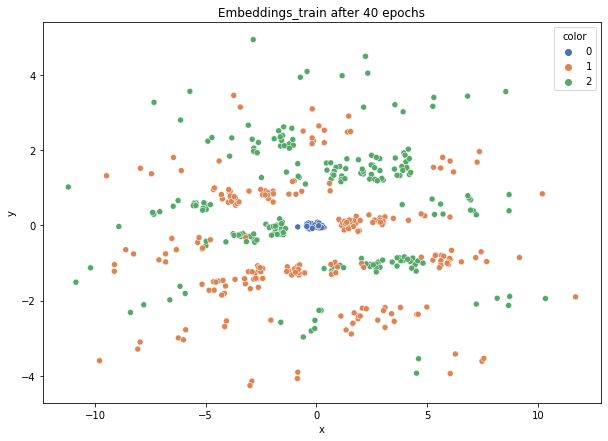

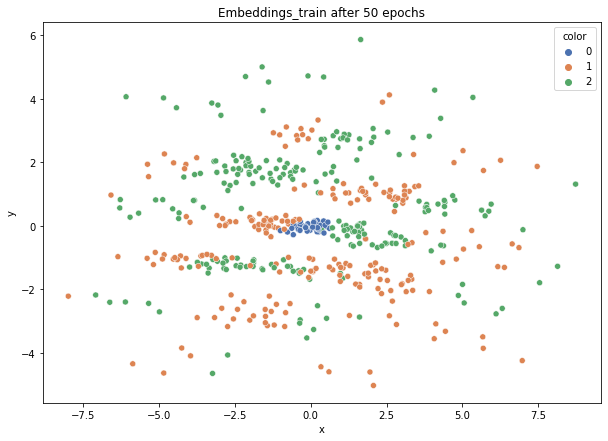

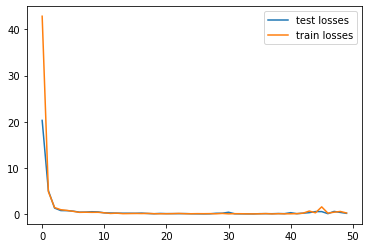

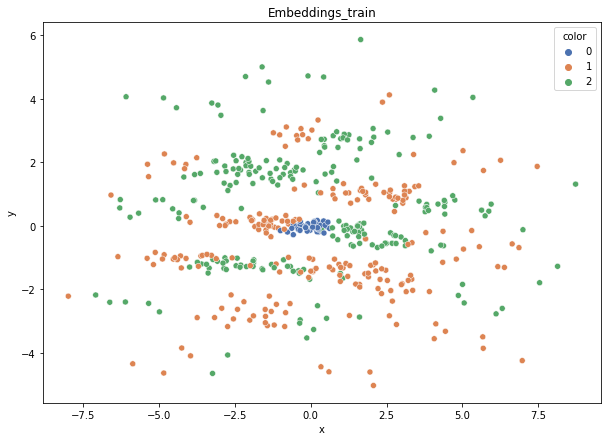

DT-f1-new-features: 0.793
DT-f1-old+new-features: 0.842
DT-f1-old-features: 0.638
DT-gmean-new-features: 0.832
DT-gmean-old+new-features: 0.851
DT-gmean-old-features: 0.585
KNN-f1-new-features: 0.959
KNN-f1-old+new-features: 0.942
KNN-f1-old-features: 0.545
KNN-gmean-new-features: 0.959
KNN-gmean-old+new-features: 0.941
KNN-gmean-old-features: 0.088
LDA-f1-new-features: 0.569
LDA-f1-old+new-features: 0.78
LDA-f1-old-features: 0.601
LDA-gmean-new-features: 0.092
LDA-gmean-old+new-features: 0.71
LDA-gmean-old-features: 0.096
QDA-f1-new-features: 0.846
QDA-f1-old+new-features: 0.939
QDA-f1-old-features: 0.845
QDA-gmean-new-features: 0.845
QDA-gmean-old+new-features: 0.925
QDA-gmean-old-features: 0.908
RF24-f1-new-features: 0.911
RF24-f1-old+new-features: 0.929
RF24-f1-old-features: 0.591
RF24-gmean-new-features: 0.935
RF24-gmean-old+new-features: 0.953
RF24-gmean-old-features: 0.092


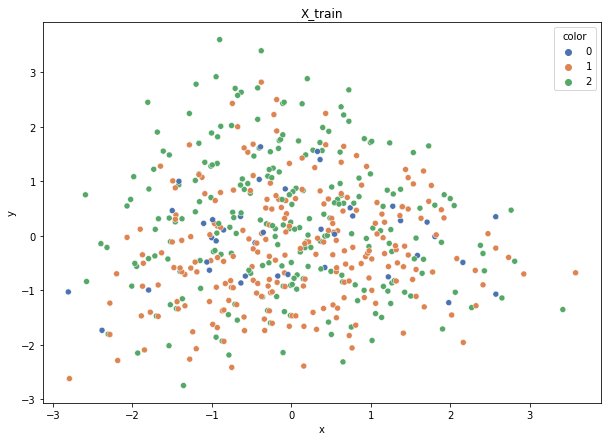

Class cardinalities: Counter({2: 231, 1: 230, 0: 39})
Weights: {2: 0.12614436991098174, 1: 0.1266928236932034, 0: 0.7471628063958148}
Training autoencoder...


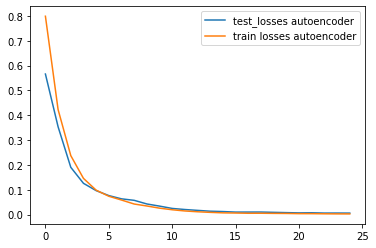

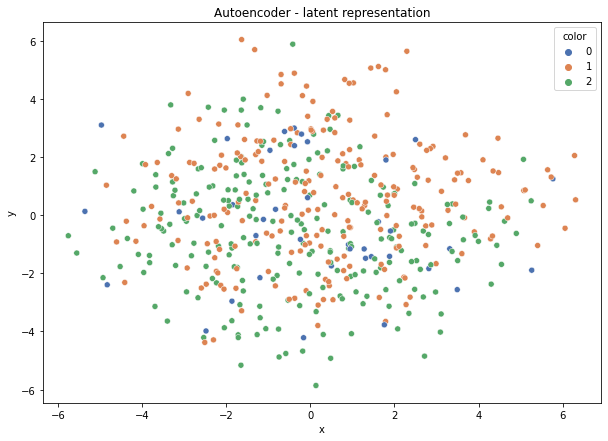

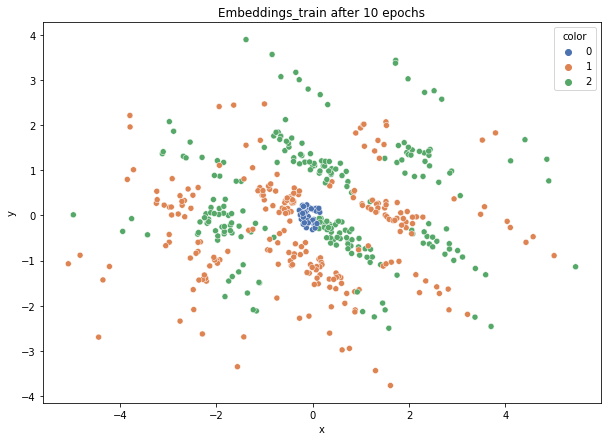

Zero loss!
Zero loss!


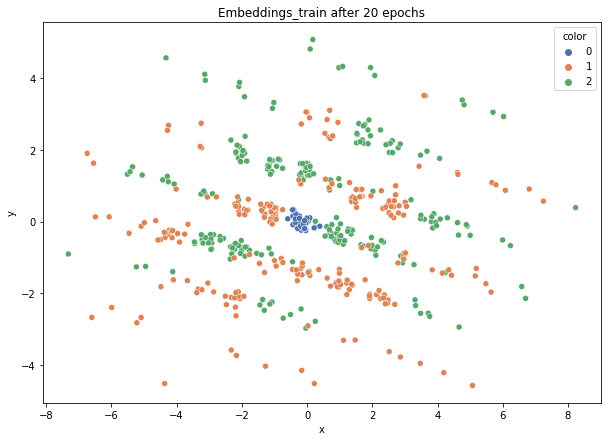

Zero loss!
Zero loss!
Zero loss!


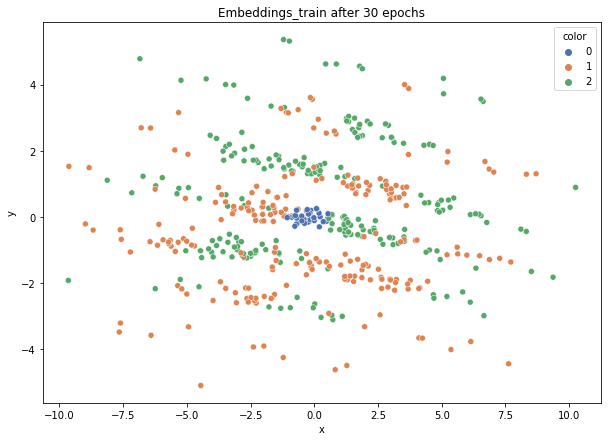

Zero loss!
Zero loss!
Zero loss!


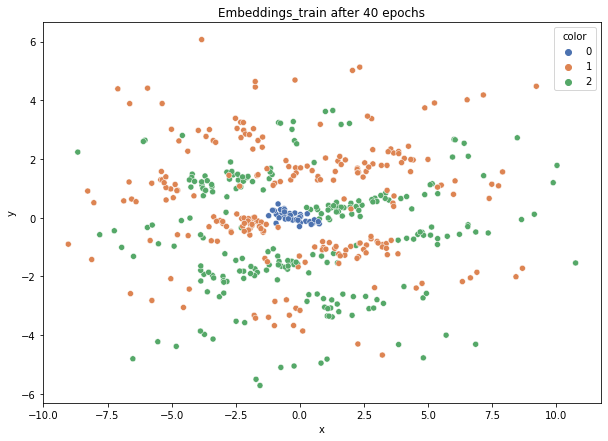

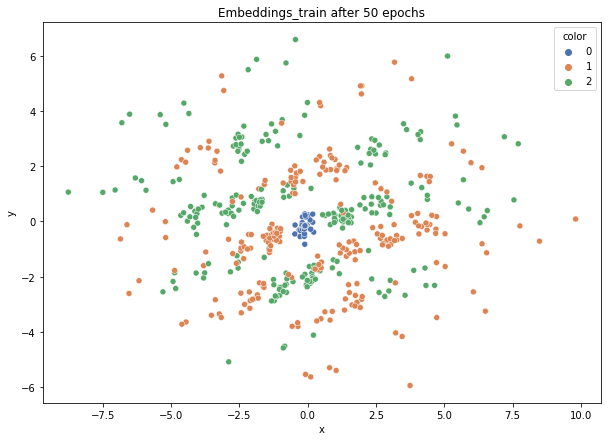

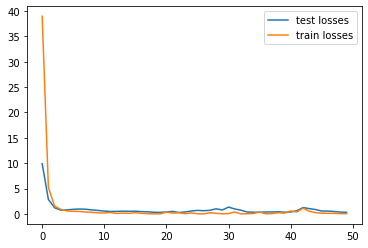

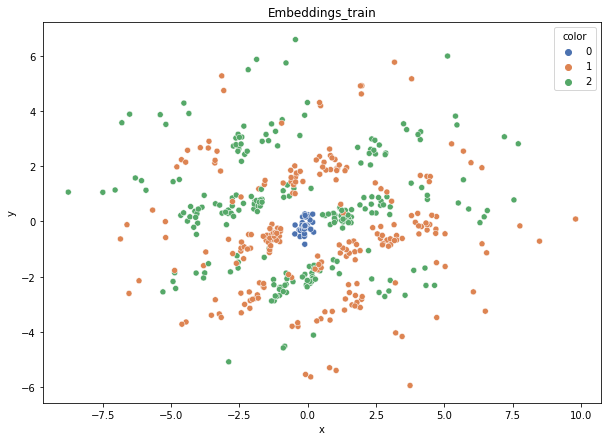

DT-f1-new-features: 0.843
DT-f1-old+new-features: 0.87
DT-f1-old-features: 0.655
DT-gmean-new-features: 0.834
DT-gmean-old+new-features: 0.88
DT-gmean-old-features: 0.597
KNN-f1-new-features: 0.942
KNN-f1-old+new-features: 0.923
KNN-f1-old-features: 0.566
KNN-gmean-new-features: 0.941
KNN-gmean-old+new-features: 0.947
KNN-gmean-old-features: 0.09
LDA-f1-new-features: 0.467
LDA-f1-old+new-features: 0.841
LDA-f1-old-features: 0.6
LDA-gmean-new-features: 0.345
LDA-gmean-old+new-features: 0.775
LDA-gmean-old-features: 0.096
QDA-f1-new-features: 0.715
QDA-f1-old+new-features: 0.87
QDA-f1-old-features: 0.836
QDA-gmean-new-features: 0.679
QDA-gmean-old+new-features: 0.83
QDA-gmean-old-features: 0.923
RF24-f1-new-features: 0.936
RF24-f1-old+new-features: 0.971
RF24-f1-old-features: 0.602
RF24-gmean-new-features: 0.935
RF24-gmean-old+new-features: 0.971
RF24-gmean-old-features: 0.093


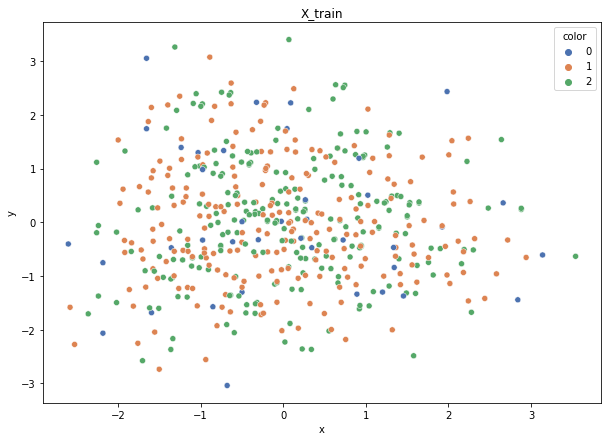

Class cardinalities: Counter({2: 231, 1: 230, 0: 39})
Weights: {0: 0.7471628063958148, 2: 0.12614436991098174, 1: 0.1266928236932034}
Training autoencoder...


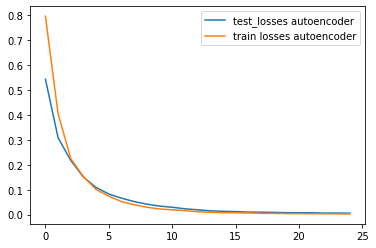

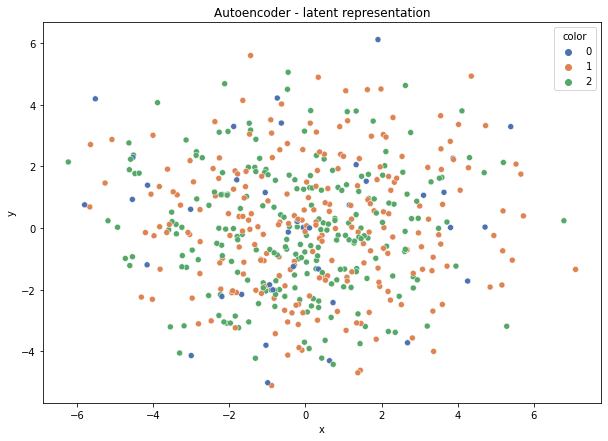

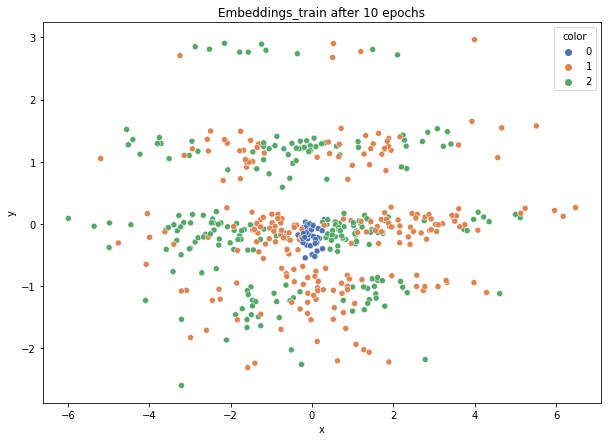

Zero loss!


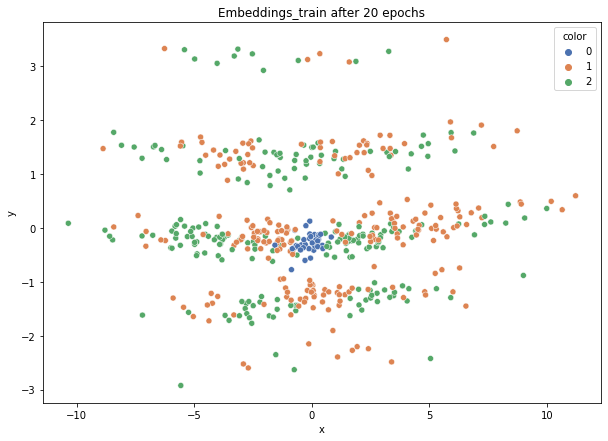

Zero loss!
Zero loss!
Zero loss!


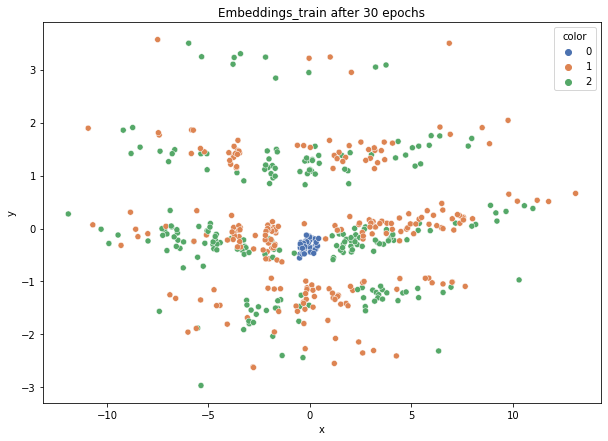

Zero loss!


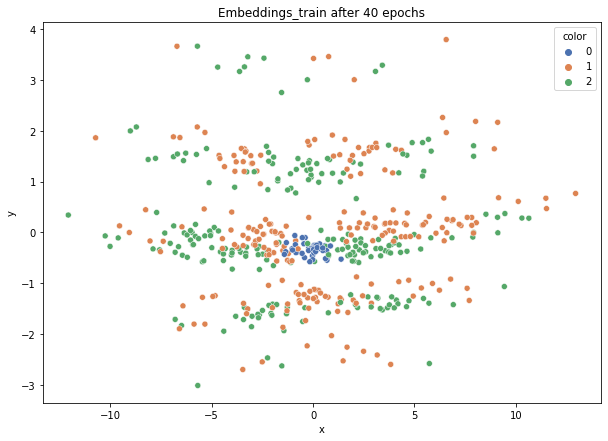

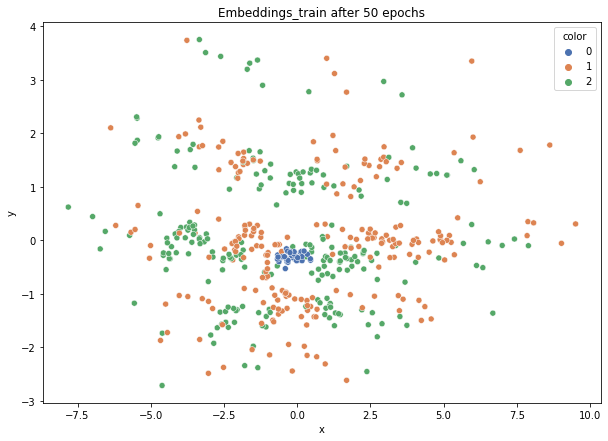

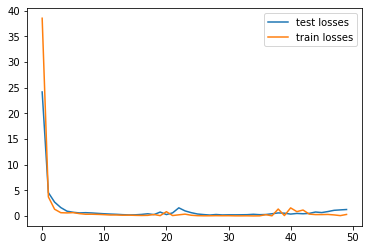

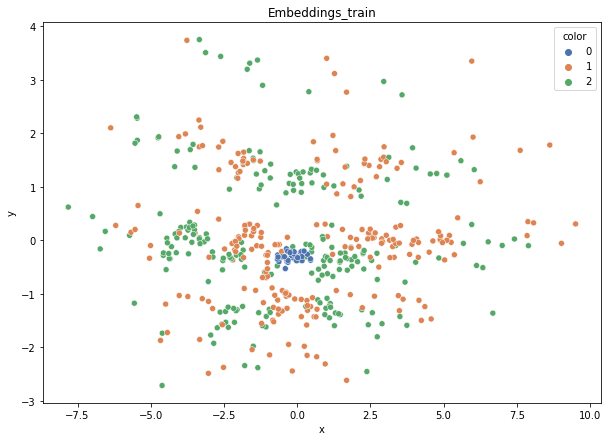

DT-f1-new-features: 0.742
DT-f1-old+new-features: 0.748
DT-f1-old-features: 0.582
DT-gmean-new-features: 0.719
DT-gmean-old+new-features: 0.726
DT-gmean-old-features: 0.397
KNN-f1-new-features: 0.964
KNN-f1-old+new-features: 0.869
KNN-f1-old-features: 0.562
KNN-gmean-new-features: 0.977
KNN-gmean-old+new-features: 0.857
KNN-gmean-old-features: 0.089
LDA-f1-new-features: 0.591
LDA-f1-old+new-features: 0.871
LDA-f1-old-features: 0.6
LDA-gmean-new-features: 0.409
LDA-gmean-old+new-features: 0.824
LDA-gmean-old-features: 0.096
QDA-f1-new-features: 0.824
QDA-f1-old+new-features: 0.841
QDA-f1-old-features: 0.809
QDA-gmean-new-features: 0.787
QDA-gmean-old+new-features: 0.766
QDA-gmean-old-features: 0.862
RF24-f1-new-features: 0.84
RF24-f1-old+new-features: 0.84
RF24-f1-old-features: 0.603
RF24-gmean-new-features: 0.814
RF24-gmean-old+new-features: 0.814
RF24-gmean-old-features: 0.094


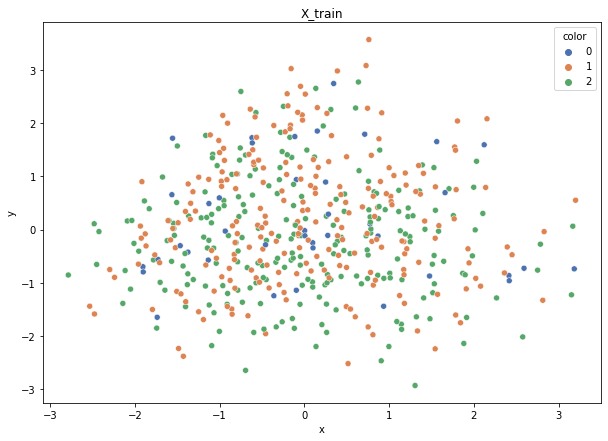

Class cardinalities: Counter({2: 230, 1: 230, 0: 40})
Weights: {0: 0.7419354838709677, 2: 0.12903225806451613, 1: 0.12903225806451613}
Training autoencoder...


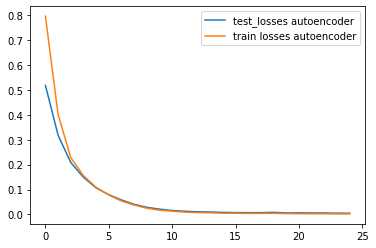

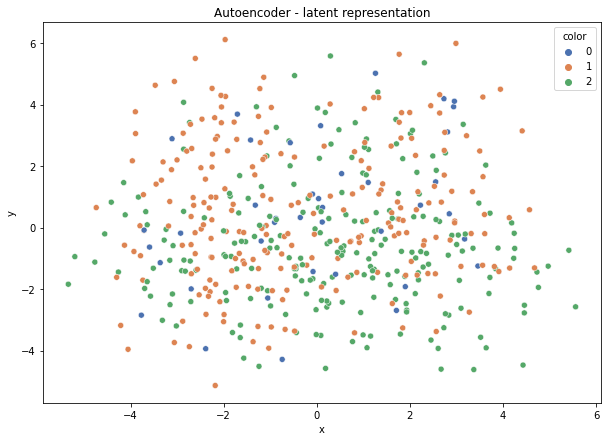

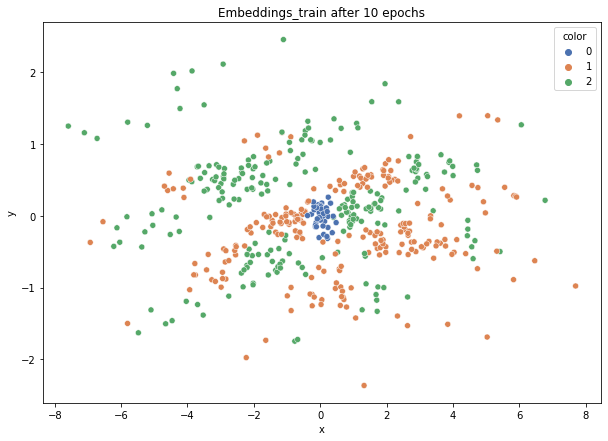

Zero loss!
Zero loss!


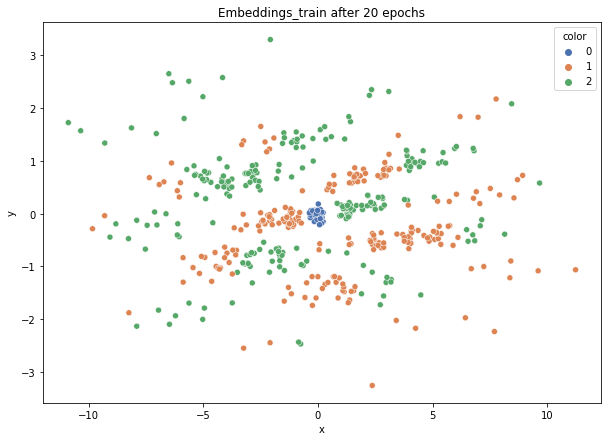

Zero loss!
Zero loss!
Zero loss!


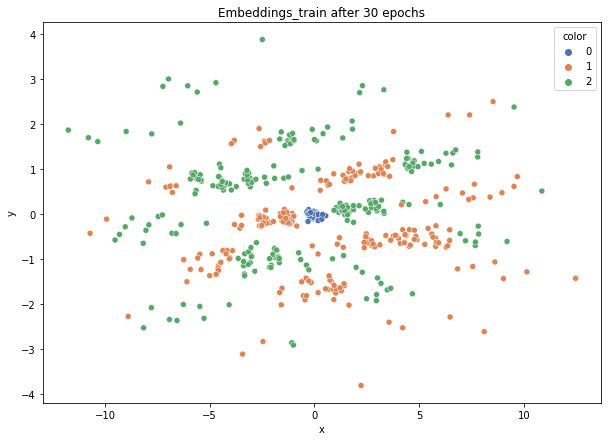

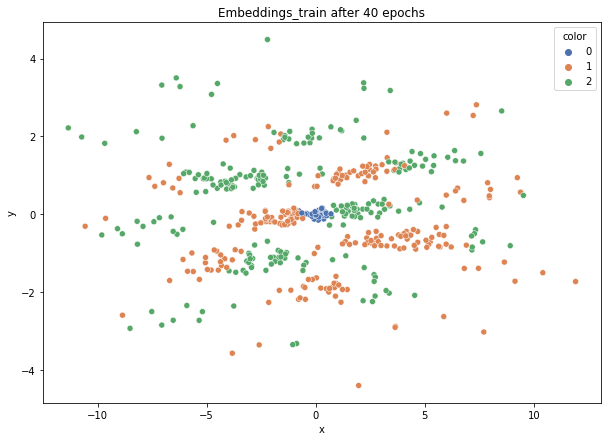

Zero loss!
Zero loss!


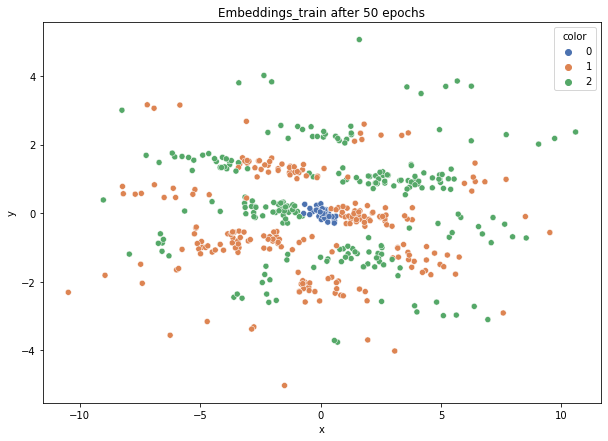

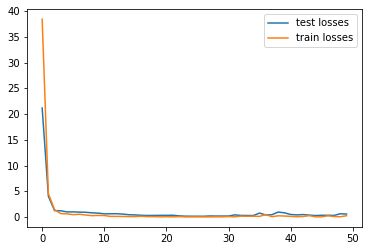

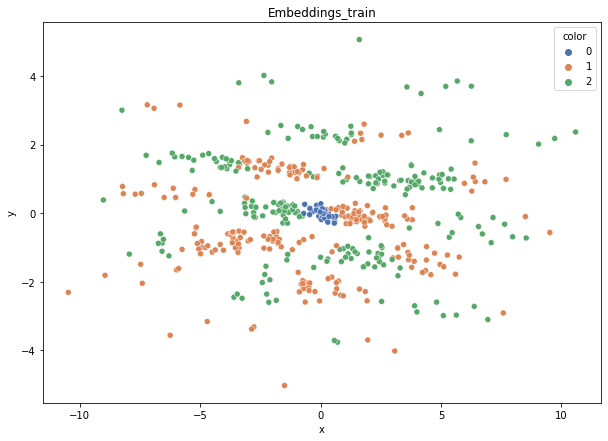

DT-f1-new-features: 0.801
DT-f1-old+new-features: 0.784
DT-f1-old-features: 0.582
DT-gmean-new-features: 0.754
DT-gmean-old+new-features: 0.74
DT-gmean-old-features: 0.415
KNN-f1-new-features: 0.944
KNN-f1-old+new-features: 0.945
KNN-f1-old-features: 0.563
KNN-gmean-new-features: 0.971
KNN-gmean-old+new-features: 0.959
KNN-gmean-old-features: 0.089
LDA-f1-new-features: 0.644
LDA-f1-old+new-features: 0.875
LDA-f1-old-features: 0.62
LDA-gmean-new-features: 0.447
LDA-gmean-old+new-features: 0.817
LDA-gmean-old-features: 0.098
QDA-f1-new-features: 0.85
QDA-f1-old+new-features: 0.896
QDA-f1-old-features: 0.859
QDA-gmean-new-features: 0.821
QDA-gmean-old+new-features: 0.866
QDA-gmean-old-features: 0.917
RF24-f1-new-features: 0.914
RF24-f1-old+new-features: 0.926
RF24-f1-old-features: 0.587
RF24-gmean-new-features: 0.898
RF24-gmean-old+new-features: 0.91
RF24-gmean-old-features: 0.091


In [15]:
result_dict = defaultdict(list)

safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    safety_dict["dataset"].append(dataset_name)
    fold_safety_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']

    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)

    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]

    for train_index, test_index in folds:
#         try:
        X_train, X_test = X[train_index], X[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)
        y_train, y_test = y[train_index], y[test_index]


        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)


        # PCA X_train
        pca = PCA(n_components=2)
        pca.fit(X_train_enc)
        plot_embeddings(pca.transform(X_train_enc), y_train)
        plt.title("X_train")
        plt.show()

        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        autoenc_cfg = autoencoder_config[dataset_name]
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg, pca, autoenc_cfg, k_dict[dataset_name], dataset_name)

        s_dict = calc_safety5(embeddings_test, y_test)
        for k, v in s_dict.items():
            fold_safety_dict[f"emb-{k}"].append(v)

        s_dict = calc_safety5(X_test_enc, y_test)
        for k,v in s_dict.items():
            fold_safety_dict[f"raw-{k}"].append(v)

        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()

        X_train_new = np.hstack([X_train_norm, embeddings_train])
        X_test_new = np.hstack([X_test_norm, embeddings_test])

        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_norm, y_train)
            preds = clf.predict(X_test_norm)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)

        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)

        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
#         except:
#             print("Error in one of the folds")

    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))

    for k in fold_safety_dict:
        safety_dict[k].append(np.sum(fold_safety_dict[k]) / X.shape[0])

In [16]:
results_df = pd.DataFrame.from_dict(result_dict)

In [17]:
# safety_dict['emb-outlier'].append("None")

In [18]:
safety_df = pd.DataFrame.from_dict(safety_dict)

In [19]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,KNN-f1-old-features,KNN-gmean-old-features,QDA-f1-old-features,QDA-gmean-old-features,LDA-f1-old-features,...,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features,KNN-f1-new-features,KNN-gmean-new-features,QDA-f1-new-features,QDA-gmean-new-features,LDA-f1-new-features,LDA-gmean-new-features
0,balance-scale,0.593905,0.092184,0.605016,0.416495,0.560676,0.089082,0.857046,0.916265,0.607652,...,0.908711,0.904725,0.812345,0.803786,0.950148,0.957691,0.794925,0.765193,0.550462,0.275085


In [20]:
safety_df[sorted(safety_df.filter(regex=("dataset|emb")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,emb-borderline,emb-outlier,emb-rare,emb-safe
0,balance-scale,0.270400,0.035200,0.081600,0.612800


In [21]:
safety_df[sorted(safety_df.filter(regex=("dataset|raw")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,raw-borderline,raw-outlier,raw-rare,raw-safe
0,balance-scale,0.505600,0.064000,0.120000,0.310400


In [22]:
safety_df[sorted(safety_df.filter(regex=("dataset|.*safe")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,emb-safe,raw-safe
0,balance-scale,0.612800,0.310400


In [23]:
results_df.filter(regex=("dataset|RF24-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,balance-scale,0.593905,0.927255,0.908711


In [24]:
results_df.filter(regex=("dataset|RF24-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,balance-scale,0.092184,0.923739,0.904725


In [25]:
results_df.filter(regex=("dataset|DT-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,balance-scale,0.605016,0.829026,0.812345


In [26]:
results_df.filter(regex=("dataset|DT-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,balance-scale,0.416495,0.818615,0.803786


In [27]:
results_df.filter(regex=("dataset|KNN-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-f1-old-features,KNN-f1-old+new-features,KNN-f1-new-features
0,balance-scale,0.560676,0.925118,0.950148


In [28]:
results_df.filter(regex=("dataset|KNN-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-gmean-old-features,KNN-gmean-old+new-features,KNN-gmean-new-features
0,balance-scale,0.089082,0.932616,0.957691


In [29]:
results_df.filter(regex=("dataset|QDA-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,QDA-f1-old-features,QDA-f1-old+new-features,QDA-f1-new-features
0,balance-scale,0.857046,0.878200,0.794925


In [30]:
results_df.filter(regex=("dataset|QDA-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,QDA-gmean-old-features,QDA-gmean-old+new-features,QDA-gmean-new-features
0,balance-scale,0.916265,0.831407,0.765193


In [31]:
results_df.filter(regex=("dataset|LDA-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,LDA-f1-old-features,LDA-f1-old+new-features,LDA-f1-new-features
0,balance-scale,0.607652,0.846046,0.550462


In [32]:
results_df.filter(regex=("dataset|LDA-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,LDA-gmean-old-features,LDA-gmean-old+new-features,LDA-gmean-new-features
0,balance-scale,0.096584,0.782107,0.275085
